In [1]:
import os
import glob
import numpy as np
import pandas as pd
import nibabel as nib
import nilearn
from nilearn import plotting, image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

/home/stevenm/.conda/envs/python3/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
from matplotlib.transforms import (
    Bbox, TransformedBbox, blended_transform_factory)
from mpl_toolkits.axes_grid1.inset_locator import (
    BboxPatch, BboxConnector, BboxConnectorPatch)
from matplotlib import patches 
from matplotlib.patches import ConnectionPatch


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = {
            **prop_lines,
            "alpha": prop_lines.get("alpha", 1) * 0.2,
        }

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           # loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    Connect *ax1* and *ax2*. The *xmin*-to-*xmax* range in both axes will
    be marked.

    Parameters
    ----------
    ax1
        The main axes.
    ax2
        The zoomed axes.
    xmin, xmax
        The limits of the colored area in both plot axes.
    **kwargs
        Arguments passed to the patch constructor.
    """

    trans1 = blended_transform_factory(ax1.transData, ax1.transAxes)
    trans2 = blended_transform_factory(ax2.transData, ax2.transAxes)

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, trans1)
    mybbox2 = TransformedBbox(bbox, trans2)

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


In [3]:
sub_nr = '008'

iron = nib.load(f'/home/pilou/Projects/Ahead-Database/IronMyelin-mapping/sub-{sub_nr}_qmri2map-iron.nii.gz')
myelin = nib.load(f'/home/pilou/Projects/Ahead-Database/IronMyelin-mapping/sub-{sub_nr}_qmri2map-myelin.nii.gz')

r1 = nib.load(f'/home/pilou/Projects/Ahead-Database/qMRI-Recomputed/sub-{sub_nr}/ses-1/anat/wb/qmri/sub-{sub_nr}_ses-1_acq-wb_mod-r1hz_orient-std_brain.nii.gz')
r2 = nib.load(f'/home/pilou/Projects/Ahead-Database/qMRI-Recomputed/sub-{sub_nr}/ses-1/anat/wb/qmri/sub-{sub_nr}_ses-1_acq-wb_mod-r2hz_orient-std_brain.nii.gz')
qsm = nib.load(f'/home/pilou/Projects/Ahead-Database/qMRI-Recomputed/sub-{sub_nr}/ses-1/anat/wb/qmri/sub-{sub_nr}_ses-1_acq-wb_mod-qsm_orient-std_brain.nii.gz')

In [4]:
iron_data = iron.get_fdata()
myelin_data = myelin.get_fdata()
r1_data = r1.get_fdata()
r2_data = r2.get_fdata()
qsm_data = qsm.get_fdata()

In [5]:
# x = slice(0, iron_data.shape[0])
x = slice(iron_data.shape[0])
y = 150
z = slice(iron_data.shape[2])

Text(0.5, 1.0, 'Myelin')

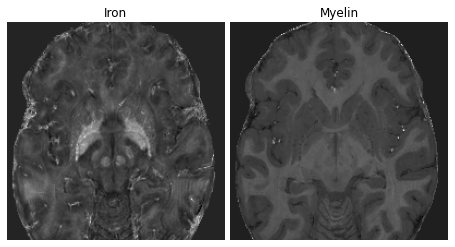

In [6]:
f, ax = plt.subplots(1,2, figsize=(8,4), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].imshow(iron_data[16:216,75:275,135].T, origin='lower', cmap='gray')
ax[0].axis('off')
ax[0].set_title('Iron')
ax[1].imshow(myelin_data[16:216,75:275,135].T, origin='lower', cmap='gray')
ax[1].axis('off')
ax[1].set_title('Myelin')

# f.savefig('../figures/figure8_iron_myelin.pdf', bbox_inches='tight')

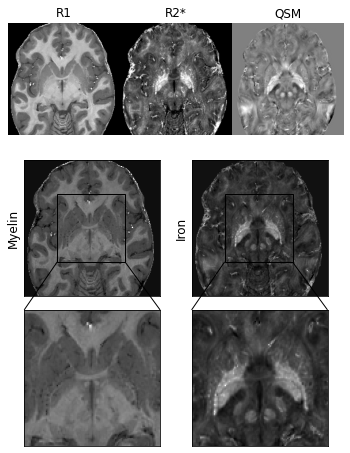

In [7]:
f = plt.figure(figsize=(6,8))
gs = gridspec.GridSpec(3, 6, figure=f, hspace=.1, wspace=0)

# f, ax = plt.subplots(2,6, figsize=(8,4), gridspec_kw={'ncols': 6, 'nrows': 2, 'hspace': 0, 'wspace': 0})
ax01 = f.add_subplot(gs[0, 0:2])
ax02 = f.add_subplot(gs[0, 2:4])
ax03 = f.add_subplot(gs[0, 4:6])
ax11 = f.add_subplot(gs[1, 0:3])
ax12 = f.add_subplot(gs[1, 3:6])

ax01.imshow(r1_data[16:216,75:275,135].T, origin='lower', cmap='gray')
ax01.axis('off')
ax01.set_title('R1')

ax02.imshow(r2_data[16:216,75:275,135].T, origin='lower', cmap='gray')
ax02.axis('off')
ax02.set_title('R2*')

ax03.imshow(qsm_data[16:216,75:275,135].T, origin='lower', cmap='gray')
ax03.axis('off')
ax03.set_title('QSM')

# get vmin, vmax
iron_data_patch = iron_data[63:163,125:225,135].T
myelin_data_patch = myelin_data[63:163,125:225,135].T
inset_iron_vminmax = iron_data_patch.min(), iron_data_patch.max()
inset_myelin_vminmax = myelin_data_patch.min(), myelin_data_patch.max()

ax11.imshow(myelin_data[16:216,75:275,135].T, origin='lower', cmap='gray', vmin=inset_myelin_vminmax[0], vmax=inset_myelin_vminmax[1])
# ax11.axis('off')
ax11.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
ax11.set_ylabel('Myelin', fontsize='large')

ax12.imshow(iron_data[16:216,75:275,135].T, origin='lower', cmap='gray', vmin=inset_iron_vminmax[0], vmax=inset_iron_vminmax[1])
# ax12.get_xaxis().set_visible(False)
# ax12.get_yaxis().set_visible(False)
ax12.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
ax12.set_ylabel('Iron', fontsize='large')

# zoom
ax21 = f.add_subplot(gs[2, 0:3])
ax22 = f.add_subplot(gs[2, 3:6])

ax22.imshow(iron_data_patch, origin='lower', cmap='gray')
ax22.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
ax21.imshow(myelin_data_patch, origin='lower', cmap='gray')
ax21.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off


## zoom 'effect'
for ax_n in [1,2]:
    if ax_n == 1:
        upper_ax = ax11
        lower_ax = ax21
    else:
        upper_ax = ax12
        lower_ax = ax22
    upper_ax.add_patch(patches.Rectangle((64-16, 50), 100, 100, linewidth=1, 
                             edgecolor='k', facecolor="none"))
#16:216
    xmin = 64-16
    xmax = 164-16
    ymin = 50
    ymax = 100
    trans1 = blended_transform_factory(upper_ax.transData, upper_ax.transData)
    trans2 = blended_transform_factory(lower_ax.transAxes, lower_ax.transAxes)

    bbox1 = Bbox.from_extents(xmin, ymin, xmax, ymax)
    bbox2 = Bbox.from_extents(0, 0, 1, 1)

    mybbox1 = TransformedBbox(bbox1, trans1)
    mybbox2 = TransformedBbox(bbox2, trans2)

    prop_patches = {"ec": "none", "alpha": 0.0}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines={}, #kwargs, 
        prop_patches=prop_patches)

    upper_ax.add_patch(bbox_patch1)
    lower_ax.add_patch(bbox_patch2)
    lower_ax.add_patch(c1)
    lower_ax.add_patch(c2)
    lower_ax.add_patch(p)

# connection patch?
# xyA = (0.25, 0)  # in axes coordinates
# xyB = (0.25, 1.00)  # n axes coordinate
# coordsA = "axes fraction"
# coordsB = "axes fraction"  #ax12.get_yaxis_transform()
# ax01.add_artist(ConnectionPatch(xyA=(0.3,0), xyB=(0.1, 1), coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax01, axesB=ax11, shrinkB=3))#, connectionstyle="arc3,rad=-.15"))
# ax02.add_artist(ConnectionPatch(xyA=(0.25,0), xyB=(0.7, 1.01), coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax02, axesB=ax11, shrinkB=2))#, connectionstyle="arc3,rad=.15"))

# ax02.add_artist(ConnectionPatch(xyA=(0.75,0), xyB=(0.3,1.01), coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax02, axesB=ax12, shrinkB=2))#, connectionstyle="arc3,rad=-.15"))
# ax03.add_artist(ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax03, axesB=ax12, shrinkB=3))#, connectionstyle="arc3,rad=.15"))

#
# ax01.transData.inverted().transform([50,0]) #ax01.transData.inverted().transform(x)
# xyA = (0.25, 0)  # in axes coordinates
# xyB = (0.25, 1.00)  # n axes coordinate
# coordsA = "axes points"
# coordsB = "axes points"  #ax12.get_yaxis_transform()
# ax01.add_artist(ConnectionPatch(xyA=ax01.transData.transform([0, 0]),       #(0.3,0), 
#                                 xyB=ax11.transData.transform([-5,100]), #(0.1, 1), 
#                                 coordsA='figure pixels', coordsB='figure pixels',
#                       arrowstyle="->", axesA=ax01, axesB=ax11, shrinkB=3))#, connectionstyle="arc3,rad=-.15"))
# ax02.add_artist(ConnectionPatch(xyA=(0.25,0), xyB=(0.7, 1.01), coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax02, axesB=ax11, shrinkB=2))#, connectionstyle="arc3,rad=.15"))

# ax02.add_artist(ConnectionPatch(xyA=(0.75,0), xyB=(0.3,1.01), coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax02, axesB=ax12, shrinkB=2))#, connectionstyle="arc3,rad=-.15"))
# ax03.add_artist(ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax03, axesB=ax12, shrinkB=3))#, connectionstyle="arc3,rad=.15"))


f.savefig('../figures/figure8_iron_myelin-v3.pdf', bbox_inches='tight')

In [70]:
iron_data[:,158,50:250].values

(234, 200)

In [69]:
iron_data[65:165,160,100:175].shape

(100, 75)

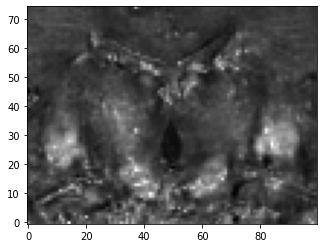

In [64]:
plt.imshow(iron_data[65:165,160,100:175].T, origin='lower', cmap='gray')

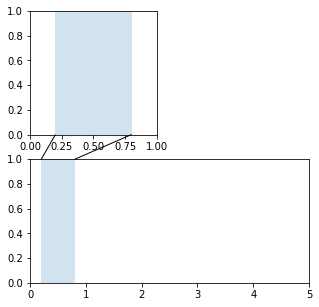

In [120]:
from matplotlib.transforms import (
    Bbox, TransformedBbox, blended_transform_factory)
from mpl_toolkits.axes_grid1.inset_locator import (
    BboxPatch, BboxConnector, BboxConnectorPatch)
from matplotlib import patches 
from matplotlib.patches import ConnectionPatch


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = {
            **prop_lines,
            "alpha": prop_lines.get("alpha", 1) * 0.2,
        }

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           # loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    Connect *ax1* and *ax2*. The *xmin*-to-*xmax* range in both axes will
    be marked.

    Parameters
    ----------
    ax1
        The main axes.
    ax2
        The zoomed axes.
    xmin, xmax
        The limits of the colored area in both plot axes.
    **kwargs
        Arguments passed to the patch constructor.
    """

    trans1 = blended_transform_factory(ax1.transData, ax1.transAxes)
    trans2 = blended_transform_factory(ax2.transData, ax2.transAxes)

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, trans1)
    mybbox2 = TransformedBbox(bbox, trans2)

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
ax1 = plt.subplot(221)
ax2 = plt.subplot(212)
ax2.set_xlim(0, 1)
ax2.set_xlim(0, 5)
zoom_effect01(ax1, ax2, 0.2, 0.8)


# ax1 = plt.subplot(222)
# ax1.set_xlim(2, 3)
# ax2.set_xlim(0, 5)
# zoom_effect02(ax1, ax2)

plt.show()


In [3]:
sub_nr = '087'

iron = nib.load(f'/home/pilou/Projects/Ahead-Database/IronMyelin-mapping/sub-{sub_nr}_qmri2map-iron.nii.gz')
myelin = nib.load(f'/home/pilou/Projects/Ahead-Database/IronMyelin-mapping/sub-{sub_nr}_qmri2map-myelin.nii.gz')

r1 = nib.load(f'/home/pilou/Projects/Ahead-Database/qMRI-Recomputed/sub-{sub_nr}/ses-1/anat/wb/qmri/sub-{sub_nr}_ses-1_acq-wb_mod-r1hz_orient-std_brain.nii.gz')
r2 = nib.load(f'/home/pilou/Projects/Ahead-Database/qMRI-Recomputed/sub-{sub_nr}/ses-1/anat/wb/qmri/sub-{sub_nr}_ses-1_acq-wb_mod-r2hz_orient-std_brain.nii.gz')
qsm = nib.load(f'/home/pilou/Projects/Ahead-Database/qMRI-Recomputed/sub-{sub_nr}/ses-1/anat/wb/qmri/sub-{sub_nr}_ses-1_acq-wb_mod-qsm_orient-std_brain.nii.gz')

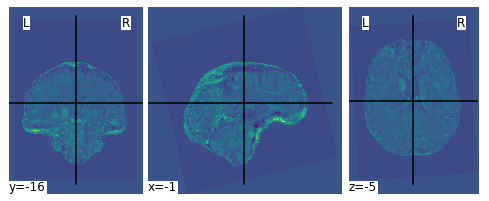

In [250]:
plotting.plot_img(iron)

In [251]:
iron_data = iron.get_fdata()
myelin_data = myelin.get_fdata()
r1_data = r1.get_fdata()
r2_data = r2.get_fdata()
qsm_data = qsm.get_fdata()

Text(0.5, 1.0, 'Myelin')

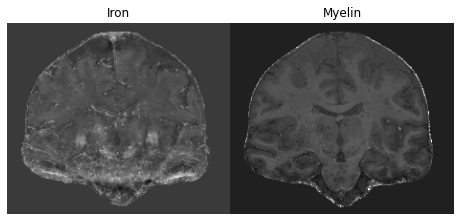

In [252]:
f, ax = plt.subplots(1,2, figsize=(8,4), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].imshow(iron_data[:,158,50:250].T, origin='lower', cmap='gray')
ax[0].axis('off')
ax[0].set_title('Iron')
ax[1].imshow(myelin_data[:,158,50:250].T, origin='lower', cmap='gray')
ax[1].axis('off')
ax[1].set_title('Myelin')

# f.savefig('../figures/figure8_iron_myelin.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'QSM')

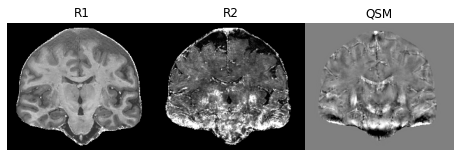

In [253]:
f, ax = plt.subplots(1,3, figsize=(8,4), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].imshow(r1_data[:,158,50:250].T, origin='lower', cmap='gray')
ax[0].axis('off')
ax[0].set_title('R1')
ax[1].imshow(r2_data[:,158,50:250].T, origin='lower', cmap='gray')
ax[1].axis('off')
ax[1].set_title('R2')

ax[2].imshow(qsm_data[:,158,50:250].T, origin='lower', cmap='gray')
ax[2].axis('off')
ax[2].set_title('QSM')

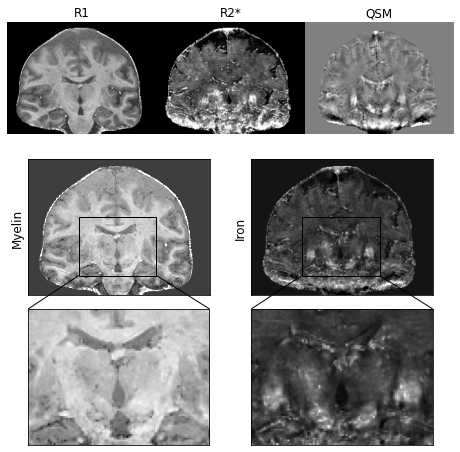

In [254]:
f = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 6, figure=f, hspace=.1, wspace=0)

# f, ax = plt.subplots(2,6, figsize=(8,4), gridspec_kw={'ncols': 6, 'nrows': 2, 'hspace': 0, 'wspace': 0})
ax01 = f.add_subplot(gs[0, 0:2])
ax02 = f.add_subplot(gs[0, 2:4])
ax03 = f.add_subplot(gs[0, 4:6])
ax11 = f.add_subplot(gs[1, 0:3])
ax12 = f.add_subplot(gs[1, 3:6])

ax01.imshow(r1_data[:,158,75:250].T, origin='lower', cmap='gray')
ax01.axis('off')
ax01.set_title('R1')

ax02.imshow(r2_data[:,158,75:250].T, origin='lower', cmap='gray')
ax02.axis('off')
ax02.set_title('R2*')

ax03.imshow(qsm_data[:,158,75:250].T, origin='lower', cmap='gray')
ax03.axis('off')
ax03.set_title('QSM')

# get vmin, vmax
inset_iron_vminmax = iron_data[65:165,160,100:175].min(), iron_data[65:165,160,100:175].max()
inset_myelin_vminmax = myelin_data[65:165,160,100:175].min(), myelin_data[65:165,160,100:175].max()

ax11.imshow(myelin_data[:,158,75:250].T, origin='lower', cmap='gray', vmin=inset_myelin_vminmax[0], vmax=inset_myelin_vminmax[1])
# ax11.axis('off')
ax11.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
ax11.set_ylabel('Myelin', fontsize='large')

ax12.imshow(iron_data[:,158,75:250].T, origin='lower', cmap='gray', vmin=inset_iron_vminmax[0], vmax=inset_iron_vminmax[1])
# ax12.get_xaxis().set_visible(False)
# ax12.get_yaxis().set_visible(False)
ax12.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
ax12.set_ylabel('Iron', fontsize='large')

# zoom
ax21 = f.add_subplot(gs[2, 0:3])
ax22 = f.add_subplot(gs[2, 3:6])

ax22.imshow(iron_data[65:165,160,100:175].T, origin='lower', cmap='gray')
ax22.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
ax21.imshow(myelin_data[65:165,160,100:175].T, origin='lower', cmap='gray')
ax21.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off


## zoom 'effect'
for ax_n in [1,2]:
    if ax_n == 1:
        upper_ax = ax11
        lower_ax = ax21
    else:
        upper_ax = ax12
        lower_ax = ax22
    upper_ax.add_patch(patches.Rectangle((65, 25), 100, 75, linewidth=1, 
                             edgecolor='k', facecolor="none"))

    xmin = 65
    xmax = 165
    ymin = 25
    ymax = 100
    trans1 = blended_transform_factory(upper_ax.transData, upper_ax.transData)
    trans2 = blended_transform_factory(lower_ax.transAxes, lower_ax.transAxes)

    bbox1 = Bbox.from_extents(xmin, ymin, xmax, ymax)
    bbox2 = Bbox.from_extents(0, 0, 1, 1)

    mybbox1 = TransformedBbox(bbox1, trans1)
    mybbox2 = TransformedBbox(bbox2, trans2)

    prop_patches = {"ec": "none", "alpha": 0.0}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines={}, #kwargs, 
        prop_patches=prop_patches)

    upper_ax.add_patch(bbox_patch1)
    lower_ax.add_patch(bbox_patch2)
    lower_ax.add_patch(c1)
    lower_ax.add_patch(c2)
    lower_ax.add_patch(p)

# connection patch?
# xyA = (0.25, 0)  # in axes coordinates
# xyB = (0.25, 1.00)  # n axes coordinate
# coordsA = "axes fraction"
# coordsB = "axes fraction"  #ax12.get_yaxis_transform()
# ax01.add_artist(ConnectionPatch(xyA=(0.3,0), xyB=(0.1, 1), coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax01, axesB=ax11, shrinkB=3))#, connectionstyle="arc3,rad=-.15"))
# ax02.add_artist(ConnectionPatch(xyA=(0.25,0), xyB=(0.7, 1.01), coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax02, axesB=ax11, shrinkB=2))#, connectionstyle="arc3,rad=.15"))

# ax02.add_artist(ConnectionPatch(xyA=(0.75,0), xyB=(0.3,1.01), coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax02, axesB=ax12, shrinkB=2))#, connectionstyle="arc3,rad=-.15"))
# ax03.add_artist(ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax03, axesB=ax12, shrinkB=3))#, connectionstyle="arc3,rad=.15"))

#
# ax01.transData.inverted().transform([50,0]) #ax01.transData.inverted().transform(x)
# xyA = (0.25, 0)  # in axes coordinates
# xyB = (0.25, 1.00)  # n axes coordinate
# coordsA = "axes points"
# coordsB = "axes points"  #ax12.get_yaxis_transform()
# ax01.add_artist(ConnectionPatch(xyA=ax01.transData.transform([0, 0]),       #(0.3,0), 
#                                 xyB=ax11.transData.transform([-5,100]), #(0.1, 1), 
#                                 coordsA='figure pixels', coordsB='figure pixels',
#                       arrowstyle="->", axesA=ax01, axesB=ax11, shrinkB=3))#, connectionstyle="arc3,rad=-.15"))
# ax02.add_artist(ConnectionPatch(xyA=(0.25,0), xyB=(0.7, 1.01), coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax02, axesB=ax11, shrinkB=2))#, connectionstyle="arc3,rad=.15"))

# ax02.add_artist(ConnectionPatch(xyA=(0.75,0), xyB=(0.3,1.01), coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax02, axesB=ax12, shrinkB=2))#, connectionstyle="arc3,rad=-.15"))
# ax03.add_artist(ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
#                       arrowstyle="->", axesA=ax03, axesB=ax12, shrinkB=3))#, connectionstyle="arc3,rad=.15"))


f.savefig('../figures/figure8_iron_myelin-v2.pdf', bbox_inches='tight')

In [1]:
## ok i guess we're going transversal